In [1]:
device='cuda:0'

In [70]:
import torch
import model3
from torch import nn
from argparse import Namespace
Param=Namespace(
    lr=1e-3,
    epoch=300
)
mlp=torch.load('./mlp2.pth')
mlp.to(device)
for param in mlp.parameters():
    param.requires_grad = False

def make_data(batch_size,input_size,output_size):
    data=torch.randn(batch_size,input_size,input_size,requires_grad=True).to(device)
    lable=(torch.randn(batch_size,output_size)*10).to(device)
    max_index=lable.argmax(dim=1)
    lable[torch.arange(batch_size), max_index] = 50
    return data,lable

y=[]

def train():
    data,lable=make_data(10000,28,10)
    data=data.clone().detach().requires_grad_(True)
    loss_function=nn.CrossEntropyLoss()
    optimizer=torch.optim.Adam([data],lr=Param.lr)
    for epoch in range(Param.epoch):
        optimizer.zero_grad()
        output=mlp(data)
        loss=loss_function(output,lable.softmax(dim=1))
        loss.backward()
        optimizer.step()
        y.append(loss.item())
        print(f'epoch:{epoch} loss:{loss.item()}')
    return data,lable




/tmp/ipykernel_2287553/2936383013.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlp=torch.load('./mlp2.pth')


epoch:0 loss:2.933765411376953
epoch:1 loss:2.8998005390167236
epoch:2 loss:2.866231679916382
epoch:3 loss:2.833042860031128
epoch:4 loss:2.800255298614502
epoch:5 loss:2.7678639888763428
epoch:6 loss:2.735852003097534
epoch:7 loss:2.7042107582092285
epoch:8 loss:2.6729328632354736
epoch:9 loss:2.6420233249664307
epoch:10 loss:2.6114675998687744
epoch:11 loss:2.581279993057251
epoch:12 loss:2.551459789276123
epoch:13 loss:2.5220022201538086
epoch:14 loss:2.4929091930389404
epoch:15 loss:2.4641621112823486
epoch:16 loss:2.435760498046875
epoch:17 loss:2.4077041149139404
epoch:18 loss:2.3799803256988525
epoch:19 loss:2.35260272026062
epoch:20 loss:2.325559616088867
epoch:21 loss:2.298865556716919
epoch:22 loss:2.2725136280059814
epoch:23 loss:2.246488571166992
epoch:24 loss:2.220790147781372
epoch:25 loss:2.19541597366333
epoch:26 loss:2.170368194580078
epoch:27 loss:2.1456351280212402
epoch:28 loss:2.1212079524993896
epoch:29 loss:2.097092390060425
epoch:30 loss:2.0732736587524414
epoch

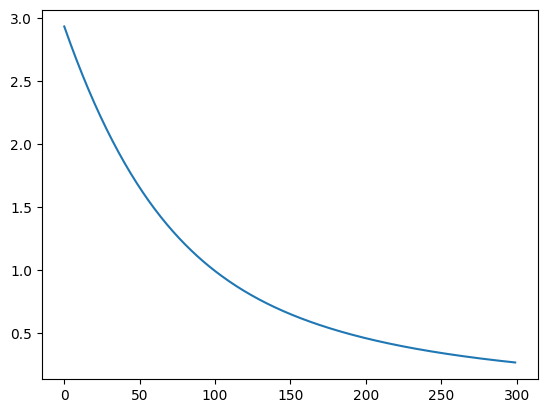

tensor([[ 7.4028e-01,  2.2946e-01,  1.2354e+00, -1.0086e+00, -3.1372e-01,
         -5.4481e-01,  6.8678e-01, -5.8172e-02,  5.2586e-01,  1.4108e-02,
          1.0374e+00, -3.9039e-02, -9.0635e-01,  2.2778e-01,  1.1269e+00,
          6.5310e-02, -1.2957e+00, -5.3924e-02, -8.7011e-02, -3.1251e-01,
         -1.2831e+00,  1.1790e-01, -5.3790e-01,  4.9814e-01,  1.2220e+00,
          4.2303e-01, -1.3575e+00, -1.6050e+00],
        [-1.2729e-01,  8.4660e-01, -4.4274e-01, -5.4504e-01, -5.7319e-01,
         -6.0308e-01,  1.6318e+00,  5.0036e-01,  1.7172e-02, -1.1925e+00,
         -6.6093e-01,  7.4047e-01,  5.5640e-01, -5.5402e-02,  1.9199e+00,
         -1.8716e+00,  4.8560e-01, -3.7240e-01,  9.1760e-01, -9.4215e-01,
          1.1510e+00, -9.4186e-01, -5.5636e-02, -1.2880e+00,  4.0053e-01,
          4.9247e-01,  1.4892e+00, -1.7109e+00],
        [ 4.4752e-01, -7.6943e-02, -1.8923e-01,  5.9661e-01,  1.1438e-01,
          1.4211e+00, -1.4642e-01, -1.1780e+00, -5.8154e-01,  3.8403e-01,
         -7.43

In [71]:
data,lable=train()
from matplotlib import pyplot as plt
plt.plot(y)
plt.show()
print(data[0])

In [72]:
output=mlp(data)
output_res=torch.argmax(output,dim=1)
lable_res=lable.argmax(dim=1)
acc=(output_res==lable_res).sum().item()/len(output_res)
print(acc)

0.9978


/tmp/ipykernel_2287553/3544840570.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlp=torch.load('./mlp2.pth')
/tmp/ipykernel_2287553/3544840570.py:92: FutureWarning: Y

ModuleList(
  (0): Linear(in_features=784, out_features=1024, bias=True)
  (1): LeakyReLU(negative_slope=0.1)
  (2): Linear(in_features=1024, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.1)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): LeakyReLU(negative_slope=0.1)
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): LeakyReLU(negative_slope=0.1)
  (8): Linear(in_features=32, out_features=10, bias=True)
)
reduced0:1.0
784
0.9978
reduced0:0.95
744
0.9972
reduced0:0.8999999999999999
705
0.997
reduced0:0.8499999999999999
666
0.9962
reduced0:0.7999999999999998
627
0.9958
reduced0:0.7499999999999998
587
0.9941
reduced0:0.6999999999999997
548
0.9916
reduced0:0.6499999999999997
509
0.9875
reduced0:0.5999999999999996
470
0.9793
reduced0:0.5499999999999996
431
0.9632
reduced0:0.49999999999999956
391
0.9405
reduced0:0.4499999999999995
352
0.9023
reduced0:0.39999999999999947
313
0.8528
reduced0:0.3499999999999994
274
0.7845
reduced0:0.299999999999

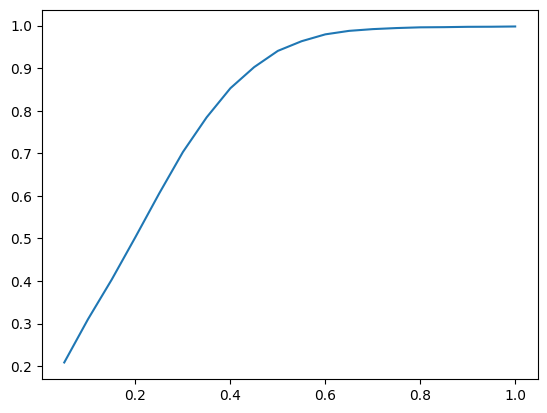

In [ ]:
import torch
import model
# from model import Bias
from torch import nn
import importlib
# importlib.reload(model)
import copy

test_inputs=data
test_lables=lable_res

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        # for i in range(len(test_inputs)):
        outputs=model(test_inputs)
        _,predicted=torch.max(outputs.data,1)
        total+=len(predicted)
        correct+=(predicted==test_lables).sum().item()
    model.train()
    return correct/total

mlp=torch.load('./mlp2.pth')
print(mlp.layers)
# input()


def svd(reduce,bound,k_down):
    for k,layer in enumerate(mlp.layers):
        if (isinstance(layer, torch.nn.Linear)):
            w=layer.weight
            b=layer.bias
            U,S,V=torch.linalg.svd(w.t())

            sort_index=torch.argsort(S)
            cnt=0
            sum=0
            for i in S.view(-1):
                sum+=i.item()
                if(i.item()<reduce):
                    cnt+=1
            
            if (len(S)<bound):
                # print(len(S))
                continue
            print(f"reduced{k}:{reduce}")
            r=int(len(S)*reduce)
            print(r)
            S_diag = torch.zeros(r,r)
            for i in range(r):
                S_diag[i, i] = S[i]
            nU=U.shape[0]
            mU=r
            nV=r
            mV=V.shape[1]
            nS=mS=r


            
            U=U[:,:mU]
            V=V[:nV,]
            
            
            # print(U.shape)
            # print(S_diag.shape)
            # print(V.shape)

            newlinear1=torch.nn.Linear(nU,mU,bias=False).to(device)
            newlinear2=torch.nn.Linear(nS,mS,bias=False).to(device)
            newlinear3=torch.nn.Linear(nV,mV,bias=False).to(device)
            newlinear1.weight=nn.Parameter(U.t())
            newlinear2.weight=nn.Parameter(S_diag.t())
            newlinear3.weight=nn.Parameter(V.t())
            newbias=model.Bias(b)
            newbias=newbias.to(device)
            # print(newlinear1.weight.shape)
            # print(newlinear2.weight.shape)
            # print(newlinear3.weight.shape)
            # print('------------')
            svded=nn.Sequential(newlinear1,newlinear2,newlinear3,newbias)
            mlp.layers[k]=svded

from matplotlib import pylab as plt
y=[]
import numpy as np
bound=700
k_down=0
for i in np.arange(1, 0, -0.05):
    mlp=torch.load('./mlp2.pth')
    svd(i,bound,k_down)
    mlp.eval()
    mlp.to(device)
    print(acc(mlp))
    y.append(acc(mlp))

plt.plot(np.arange(13,0,-0.05),y)
plt.show()
